Correlations: 
 SalePrice            1.000000
OverallQual          0.790982
GrLivArea            0.708624
GarageCars           0.640409
GarageArea           0.623431
                       ...   
GarageType_Detchd   -0.354141
BsmtQual_TA         -0.498545
GarageFinish_Unf    -0.513906
KitchenQual_TA      -0.519298
ExterQual_TA        -0.589044
Name: SalePrice, Length: 289, dtype: float64


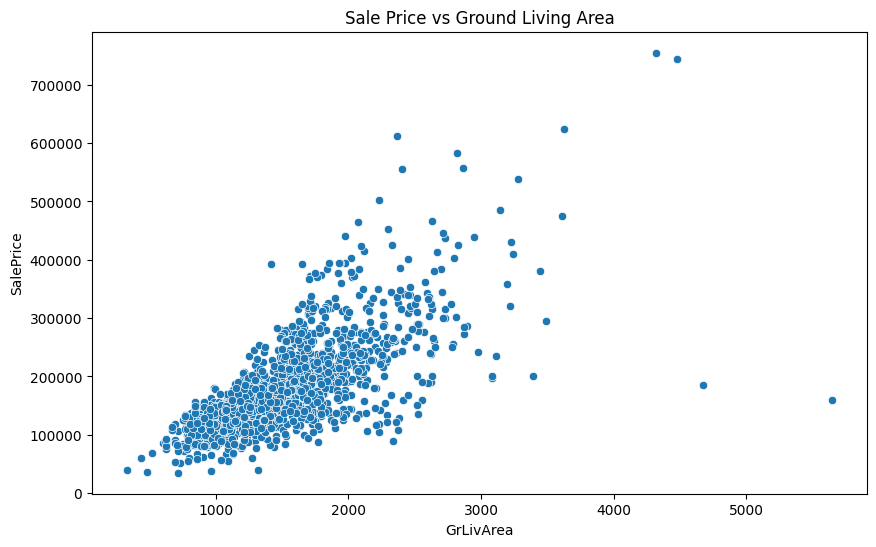

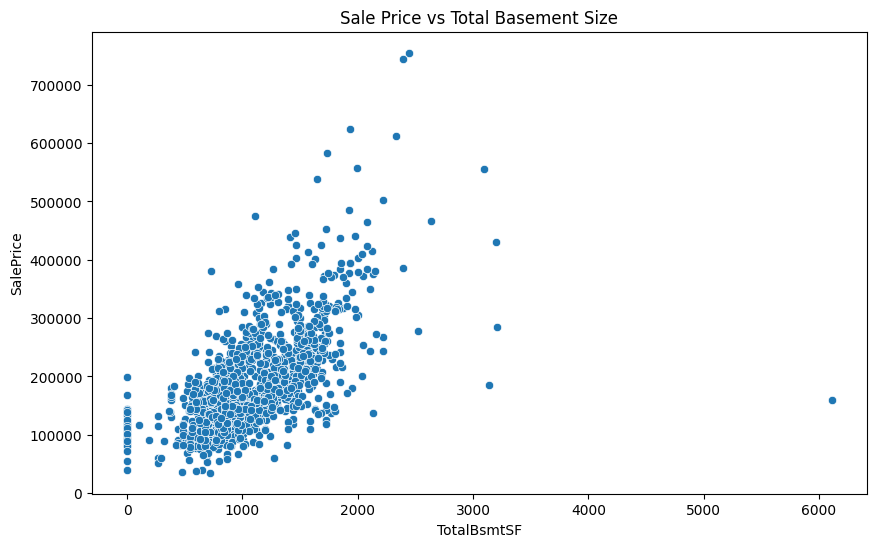

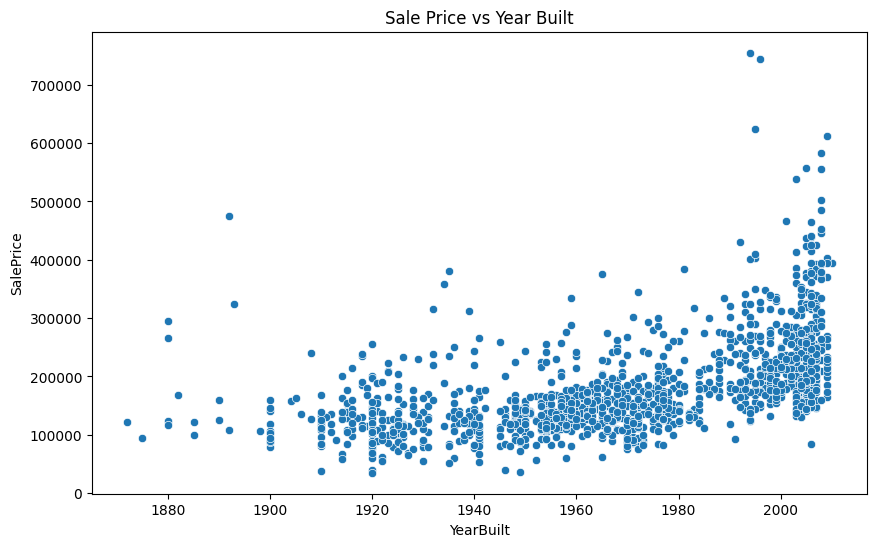

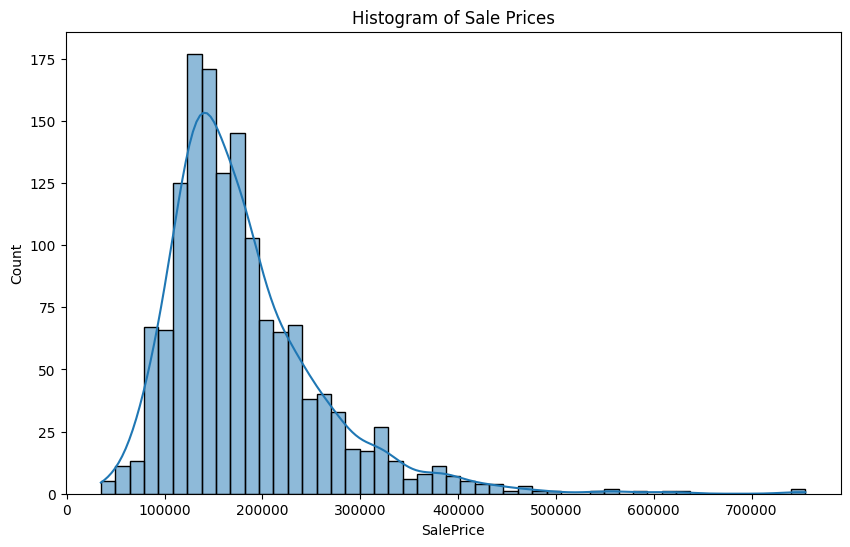

Mean Squared Error: 4.2825745357375306e+32


In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset
data = pd.read_csv('train.csv')  # Replace with the path to your dataset if it's not in the same directory

# Separate categorical and numerical columns
categorical_cols = data.select_dtypes(include='object').columns
numerical_cols = data.select_dtypes(exclude='object').columns

# Impute missing values in numerical columns with the mean
imputer_num = SimpleImputer(strategy='mean')
data[numerical_cols] = imputer_num.fit_transform(data[numerical_cols])

# Impute missing values in categorical columns with the most frequent value
imputer_cat = SimpleImputer(strategy='most_frequent')
data[categorical_cols] = imputer_cat.fit_transform(data[categorical_cols])

# Handling categorical variables by one-hot encoding
data = pd.get_dummies(data, columns=categorical_cols)

# Correlation values for each variable vs. SalePrice
correlations = data.corr()['SalePrice'].sort_values(ascending=False)
print('Correlations: \n', correlations)

# Visualizations
# 1. Sale Price vs Ground Living Area
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)
plt.title('Sale Price vs Ground Living Area')
plt.show()

# 2. Sale Price vs Total Basement Size
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=data)
plt.title('Sale Price vs Total Basement Size')
plt.show()

# 3. Sale Price vs Year Built
plt.figure(figsize=(10, 6))
sns.scatterplot(x='YearBuilt', y='SalePrice', data=data)
plt.title('Sale Price vs Year Built')
plt.show()

# 4. Histogram of sales prices of homes
plt.figure(figsize=(10, 6))
sns.histplot(data['SalePrice'], kde=True)
plt.title('Histogram of Sale Prices')
plt.show()

# Data Preprocessing
# Dropping the 'Id' column as it's not a feature
data = data.drop('Id', axis=1)

# Assuming that the target variable is 'SalePrice'
X = data.drop('SalePrice', axis=1)
y = data['SalePrice']

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Building
lr = LinearRegression()
lr.fit(X_train, y_train)

# Model Evaluation
predictions = lr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
